<a href="https://colab.research.google.com/github/shafiyah18/dicoding/blob/main/Copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Salsabila Shafiyah
- **Email:** m011d4kx1692@bangkit.academy
- **ID Dicoding:** M011D4KX1692

## Menentukan Pertanyaan Bisnis

1.   What season do people most often rent bikes?
2.   Is there a correlation between temperature indicating conditions during a high bike share trip?
3.  What is the proportion of casual users compared to registered users in bike rentals?
4. Is there a correlation between variables such as temperature, humidity, and wind speed and the total number of bike rentals?
5. What are the trends in bicycle usage over time, both daily and monthly?


## Import Semua Packages/Library yang Digunakan

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

## Data Wrangling

### Gathering Data

In [203]:
day = pd.read_csv("day.csv")
day.head() #Display the first 5 rows of the dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [204]:
hour = pd.read_csv("hour.csv")
hour.head() #Display the first 5 rows of the dataset


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Attribute Information:**

* instant: record index
* dteday : date
* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
 * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are divided to 39 max (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are divided to min=-16 and max=50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered



### Assessing Data

#### Assessing the day data

In [205]:
day.info() #Checking for the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*   We'll convert the dteday variable into a date data type.
* The season, weekday, and mnth variables, currently integers, will be converted into their corresponding string values.
* The yr variable, which denotes 0 for the year 2011 and 1 for the year 2012, will be adjusted to reflect their respective years.



In [206]:
day.isna().sum() #Checking for missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in the data

In [207]:
print( day.duplicated().sum()) #Checking for duplicated values

0


There are no duplicated values in the data

In [208]:
day.describe() #Displays descriptive statistics of the data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assessing the hour data

In [209]:
hour.info()  #Checking for the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*   We'll convert the dteday variable into a date data type.
* The season, weekday, and mnth variables, currently integers, will be converted into their corresponding string values.
* The yr variable, which denotes 0 for the year 2011 and 1 for the year 2012, will be adjusted to reflect their respective years.

In [210]:
hour.isna().sum() #Checking for missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in the data

In [211]:
print(hour.duplicated().sum()) #Checking for duplicated values

0


There are no duplicated values in the data

In [212]:
hour.describe() #Displays descriptive statistics of the data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Based on the day data

In [213]:
# Converts dteday variable to date data type
day['dteday'] = pd.to_datetime(day['dteday'])

In [214]:
# Convert season from integer to text
day['season'] = day['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

In [215]:
# Correct the values of yr variable
day['yr'] = day['dteday'].dt.year

In [216]:
# Correct the values of mnth variable
day['mnth'] = day['dteday'].dt.month_name()

In [217]:
# Convert "0" to no and "1" to yes
day['holiday'] = day['workingday'].map({1: 'yes', 0: 'no'})

In [218]:
# Correct the values of weekday variable
day['weekday'] = day['dteday'].dt.day_name()

In [219]:
# Convert "0" to no and "1" to yes
day['workingday'] = day['workingday'].map({1: 'yes', 0: 'no'})

In [220]:
# Rename columns
day = day.rename(columns = {"dteday":"date", "yr":"year", "mnth":"month", "temp":"temperature", "atemp":"feelingtemperature", "hum":"humidity","cnt":"total"})

In [221]:
day.head() # Display the first 5 rows of the dataset

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,feelingtemperature,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Winter,2011,January,no,Saturday,no,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,no,Sunday,no,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,yes,Monday,yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,yes,Tuesday,yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,yes,Wednesday,yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Based on the hour data

In [222]:
# Converts dteday variable to date data type
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [223]:
# Convert season from integer to text
hour['season'] = hour['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

In [224]:
# Correct the values of yr variable
hour['yr'] = hour['dteday'].dt.year

In [225]:
# Correct the values of mnth variable
hour['mnth'] = hour['dteday'].dt.month_name()

In [226]:
# Convert "0" to no and "1" to yes
hour['holiday'] = hour['workingday'].map({0: 'no', 1: 'yes'})

In [227]:
# Correct the values of weekday variable
hour['weekday'] = hour['dteday'].dt.day_name()

In [228]:
# Convert "0" to no and "1" to yes
hour['workingday'] = hour['workingday'].map({0: 'no', 1: 'yes'})

In [229]:
# Rename columns
hour = hour.rename(columns = {"dteday":"date", "yr":"year", "mnth":"month", "hr":"hour", "temp":"temperature", "atemp":"feelingtemperature", "hum":"humidity","cnt":"total"})

In [230]:
hour.head() # Display the first 5 rows of the dataset

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feelingtemperature,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Winter,2011,January,0,no,Saturday,no,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,no,Saturday,no,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,no,Saturday,no,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,no,Saturday,no,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,no,Saturday,no,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore day

In [231]:
day.dtypes # Checking the data type for each column in the dataframe

instant                        int64
date                  datetime64[ns]
season                        object
year                           int64
month                         object
holiday                       object
weekday                       object
workingday                    object
weathersit                     int64
temperature                  float64
feelingtemperature           float64
humidity                     float64
windspeed                    float64
casual                         int64
registered                     int64
total                          int64
dtype: object

In [232]:
day.sample(5) # Shows 5 rows random sample of data

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,feelingtemperature,humidity,windspeed,casual,registered,total
251,252,2011-09-09,Summer,2011,September,yes,Friday,yes,2,0.650000,0.578946,0.897917,0.124379,417,3127,3544
644,645,2012-10-06,Fall,2012,October,no,Saturday,no,1,0.554167,0.538521,0.664167,0.268025,3031,4934,7965
238,239,2011-08-27,Summer,2011,August,no,Saturday,no,2,0.680000,0.635556,0.850000,0.375617,226,889,1115
682,683,2012-11-13,Fall,2012,November,yes,Tuesday,yes,2,0.343333,0.323225,0.662917,0.342046,327,3767,4094
473,474,2012-04-18,Spring,2012,April,yes,Wednesday,yes,2,0.463333,0.457038,0.569167,0.167912,347,4020,4367


In [233]:
day.groupby('season', sort=False).agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registered, and total bikeshare users by season

,casual,registered,total
season,,,
Winter,60622,410726,471348
Spring,203522,715067,918589
Summer,226091,835038,1061129
Fall,129782,711831,841613


In [234]:
day.groupby('year').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registered, and total bikeshare users by year

,casual,registered,total
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [235]:
day.groupby('month', sort=False).agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registered, and total bikeshare users by month

,casual,registered,total
month,,,
January,12042,122891,134933
February,14963,136389,151352
March,44444,184476,228920
April,60802,208292,269094
May,75285,256401,331686
June,73906,272436,346342
July,78157,266791,344948
August,72039,279155,351194
September,70323,275668,345991


In [236]:
day.groupby('holiday', sort=False).agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registered, and total bikeshare users by holiday

,casual,registered,total
holiday,,,
no,316732,683537,1000269
yes,303285,1989125,2292410


In [237]:
day.groupby('weekday', sort=False).agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registered, and total bikeshare users by weekday

,casual,registered,total
weekday,,,
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Thursday,61460,423935,485395
Friday,78238,409552,487790


In [238]:
day.groupby('workingday').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registered, and total bikeshare users by workingday

,casual,registered,total
workingday,,,
no,316732,683537,1000269
yes,303285,1989125,2292410


In [239]:
day.groupby('weathersit').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registered, and total bikeshare users by weathersit

,casual,registered,total
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


In [240]:
day.groupby(['year', 'month'], sort=False).agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registered, and total bikeshare users by month and by year

casual  registered   total
year month                                
2011 January      3073       35116   38189
     February     6242       41973   48215
     March       12826       51219   64045
     April       22346       72524   94870
     May         31050      104771  135821
     June        30612      112900  143512
     July        36452      104889  141341
     August      28842      107849  136691
     September   26545      100873  127418
     October     25222       98289  123511
     November    15594       86573  102167
     December     8448       78875   87323
2012 January      8969       87775   96744
     February     8721       94416  103137
     March       31618      133257  164875
     April       38456      135768  174224
     May         44235      151630  195865
     June        43294      159536  202830
     July        41705      161902  203607
     August      43197      171306  214503
     September   43778      174795  218573
     October     34538      164303  198841
     November    21009      131655  152664
     December    13245      110468  123713

In [241]:
day.groupby([ 'month', 'date'], sort=False).agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registered, and total bikeshare users by the month and the date

casual  registered  total
month    date                                 
January  2011-01-01     331         654    985
         2011-01-02     131         670    801
         2011-01-03     120        1229   1349
         2011-01-04     108        1454   1562
         2011-01-05      82        1518   1600
...                     ...         ...    ...
December 2012-12-27     247        1867   2114
         2012-12-28     644        2451   3095
         2012-12-29     159        1182   1341
         2012-12-30     364        1432   1796
         2012-12-31     439        2290   2729

[731 rows x 3 columns]

In [242]:
day.groupby('season').agg({'temperature':'mean'}) # Shows mean of temperature by season

,temperature
season,
Fall,0.422906
Spring,0.544405
Summer,0.706309
Winter,0.297748


In [243]:
day.groupby('season').agg({'feelingtemperature':'mean'}) # Shows mean of feelingtemperature by season

,feelingtemperature
season,
Fall,0.415539
Spring,0.520307
Summer,0.655898
Winter,0.296914


### Explore hour

In [244]:
hour.dtypes # Checking the data type for each column in the dataframe

instant                        int64
date                  datetime64[ns]
season                        object
year                           int64
month                         object
hour                           int64
holiday                       object
weekday                       object
workingday                    object
weathersit                     int64
temperature                  float64
feelingtemperature           float64
humidity                     float64
windspeed                    float64
casual                         int64
registered                     int64
total                          int64
dtype: object

In [245]:
hour.sample(5) # Shows 5 rows random sample of data

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feelingtemperature,humidity,windspeed,casual,registered,total
1402,1403,2011-03-03,Winter,2011,March,17,yes,Thursday,yes,1,0.26,0.3030,0.22,0.0000,17,185,202
16981,16982,2012-12-15,Fall,2012,December,8,no,Saturday,no,2,0.26,0.2879,0.75,0.0896,8,111,119
3139,3140,2011-05-15,Spring,2011,May,17,no,Sunday,no,3,0.56,0.5303,0.78,0.3582,137,255,392
12913,12914,2012-06-27,Summer,2012,June,6,yes,Wednesday,yes,1,0.58,0.5455,0.46,0.2836,7,193,200
8639,8640,2011-12-31,Winter,2011,December,18,no,Saturday,no,1,0.42,0.4242,0.54,0.1343,13,80,93


In [246]:
hour.groupby('hour').agg({'casual': 'sum', 'registered': 'sum', 'total':'sum'}) # Shows casual, registed, and total bikeshare users by hour

,casual,registered,total
hour,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [247]:
hour.groupby('hour').agg({'temperature':'mean'}) # Shows mean of temperature by hour

,temperature
hour,
0,0.467410
1,0.459365
2,0.454573
3,0.453113
4,0.446628
5,0.436123
6,0.432469
7,0.439092
8,0.454993


In [248]:
hour.groupby('hour').agg({'feelingtemperature':'mean'}) # Shows mean of feelingtemperature by hour

,feelingtemperature
hour,
0,0.451105
1,0.443289
2,0.439184
3,0.438396
4,0.432549
5,0.423145
6,0.419376
7,0.425557
8,0.440272


## Visualization & Explanatory Analysis

### Pertanyaan 1: What season do people most often rent bikes?

In [255]:
seasonly_users_day = day.groupby("season").agg({"casual": "sum", "registered": "sum", "total": "sum"})

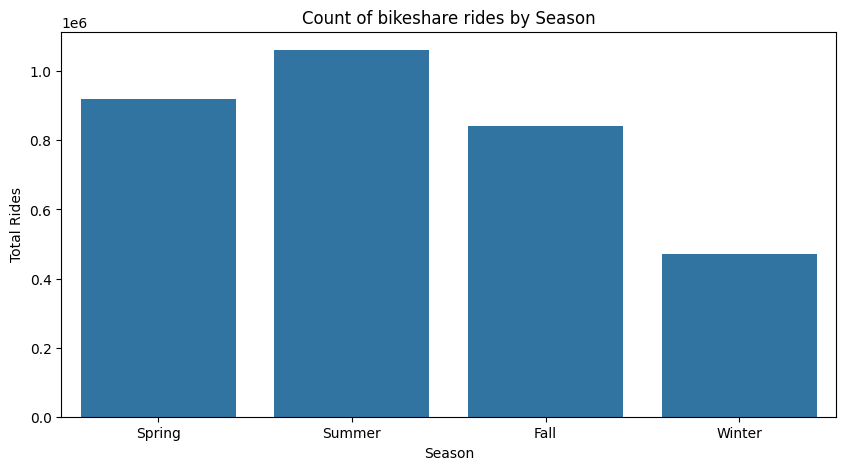

In [256]:
plt.figure(figsize=(10,5))

sns.barplot(x="season", y="total", data=seasonly_users_day, order=['Spring', 'Summer', 'Fall', 'Winter'])

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

### Pertanyaan 2: Is there a correlation between temperature indicating conditions during a high bike share trip?

In [257]:
# Returns temp value to before normalization
day['temperature'] = day['temperature']*41

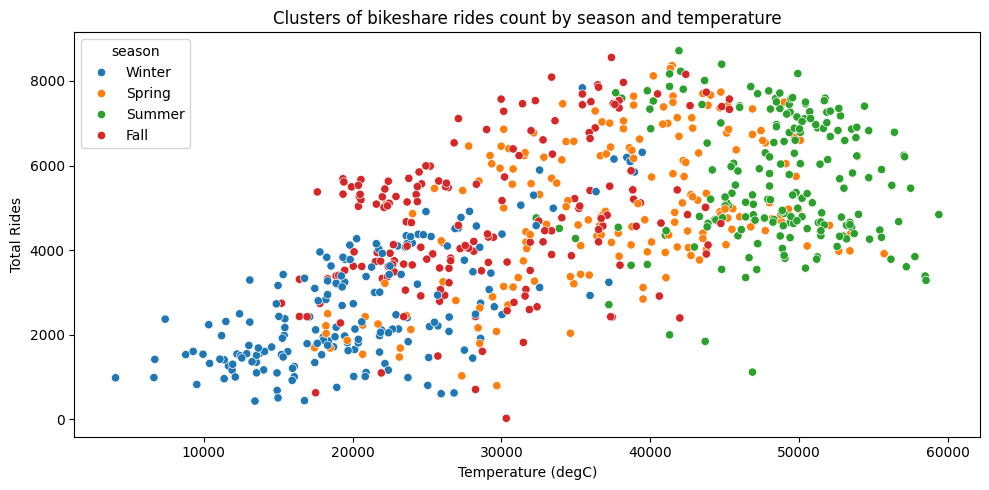

In [258]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='temperature', y='total', data=day, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and temperature")

# Show the plot
plt.tight_layout()
plt.show()

### Pertanyaan 3: What is the proportion of casual users compared to registered users in bike rentals?

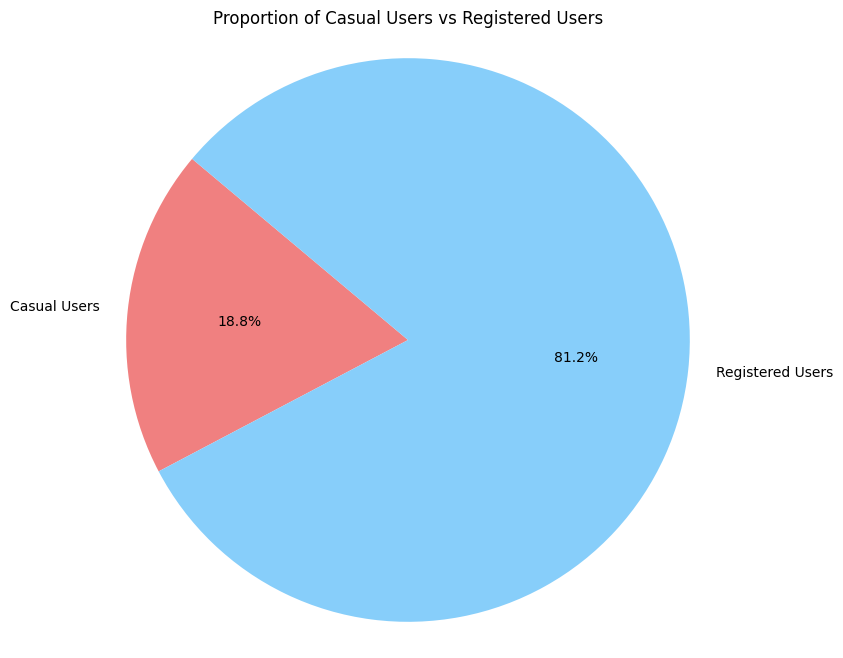

In [259]:
# Calculate proportions
proportion_casual = (day['casual'].sum()) / ((day['casual'].sum() + day['registered'].sum()))
proportion_registered = (day['registered'].sum()) / ((day['casual'].sum() + day['registered'].sum()))

# Create a pie chart
labels = ['Casual Users', 'Registered Users']
sizes = [proportion_casual, proportion_registered]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Casual Users vs Registered Users')
plt.show()

### Pertanyaan 4: Is there a correlation between variables such as temperature, humidity, and wind speed and the total number of bike rentals?

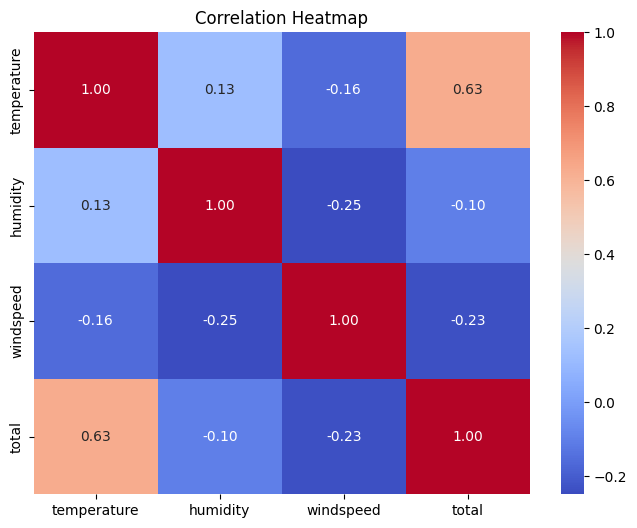

In [260]:
# Calculate correlation matrix
correlation_matrix = day[['temperature', 'humidity', 'windspeed', 'total']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Pertanyaan 5: What are the trends in bicycle usage over time, both daily and monthly?

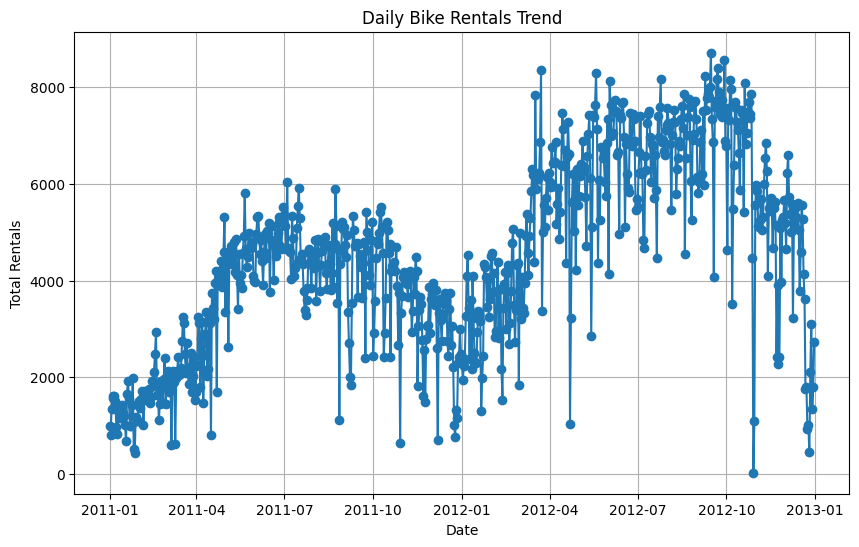

In [261]:
# Group by date and calculate total rentals
daily_rentals = day.groupby('date')['total'].sum()

# Plot daily rentals trend
plt.figure(figsize=(10, 6))
plt.plot(daily_rentals.index, daily_rentals.values, marker='o', linestyle='-')
plt.title('Daily Bike Rentals Trend')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

### Prediction for 7 days using linier regression

[6762.56049838 6768.71764756 6774.87479673 6781.03194591 6787.18909508
 6793.34624426 6799.50339343]


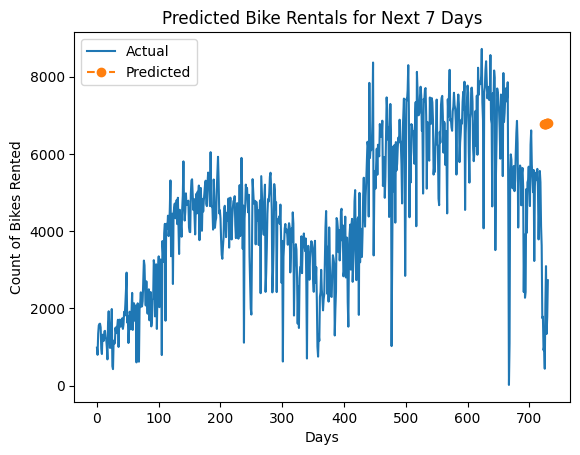

In [262]:
# Selecting the required columns
data = day[['date', 'total']]

# Splitting the data into training and testing sets
train_data = data.iloc[:-7]  # Using all data except the last 7 days for training
test_data = data.iloc[-7:]   # Using the last 7 days for testing

# Extracting features (dates) for training and testing
X_train = np.array(train_data.index).reshape(-1, 1)
X_test = np.array(test_data.index).reshape(-1, 1)

# Extracting target variable (cnt) for training
y_train = train_data['total']

# Creating and training the linear regression model
model = np.polyfit(X_train.ravel(), y_train, deg=1)

# Predicting the values for the next 7 days
predictions = np.polyval(model, X_test.ravel())
print(predictions)

# Plotting the predictions
plt.plot(data.index, data['total'], label='Actual')
plt.plot(X_test, predictions, label='Predicted', linestyle='--', marker='o')
plt.xlabel('Days')
plt.ylabel('Count of Bikes Rented')
plt.title('Predicted Bike Rentals for Next 7 Days')
plt.legend()
plt.show()

From the prediction, it is found that the total bicycle rental continues to increase every day for the next 7 days.

## Conclusion

- Conclusion pertanyaan 1 :  It can be concluded that the number of people borrowing bikes is highest in the summer season and lowest in the winter season.
- Conclusion pertanyaan 2: The number of rides is least at colder temperatures, which occurs during winter, and begins to increase as the temperature increases, which occurs in summer.
- Conclusion pertanyaan 3: With this proportion, we can understand the relative usage pattern between regular users and registered users in bicycle rental where registered users use bikeshare more than regular users.
- Conclusion pertanyaan 4: It can be identified that temperature, humidity, wind speed have the most significant influence on bicycle rentals. In addition, we can assess the strength and direction of these relationships to gain insight into how weather conditions affect bicycle rental patterns. That windspeed and humidity have a negative effect on total bike rentals while temperature has a positive effect on total bike rentals. A
- Conclusion pertanyaan 5: The quantity of bike rentals in 2012 surpassed that of 2011. Both years exhibited similar patterns and seasonal variations, characterized by an upsurge in rentals during the middle of the year and a decline at the year's commencement and conclusion
